In [4]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import *
import scipy as scipy
from scipy import optimize
from matplotlib import gridspec
%matplotlib inline

This is a reference (stand alone) notebook that goes along with <a href='http://emilygraceripka.com/blog/20'><b>this</b></a> blog post on how to work with experimental data which has many scans. <br>
This is helpful for things like fluorescence, XRD, or NMR spectroscopy data for a system monitored over time. <br>
Further, you may find this helpful for a general understanding of how to work with ndarrays and dataframes, and how to go between the two data types. 

<a id='TOC'></a>
## Table of Contents (TOC)
1. <a href='#1'><b>Data Cleaning</b></a><br>
  1.1 <a href='#1.1'>Reading in data</a><br>
  1.2 <a href='#1.2'>Selecting range of rows</a><br>
  1.3 <a href='#1.3'>Changing index</a><br>
  1.4 <a href='#1.4'>Deleting columns</a><br>
  1.5 <a href='#1.5'>Renaming columns</a><br>
  1.6 <a href='#1.6'>Plotting data</a><br>
2. <a href='#2'><b>Fitting Data to Gaussian Peaks</b></a><br>
  2.1 <a href='#2.1'>Iterative fitting over dataframe</a><br>
  2.2 <a href='#2.2'>Converting nddata Fitting parameters to a dataframe</a><br>
3. <a href='#3'><b>Extracting Fitting Information</b></a><br>
  3.1 <a href='#3.1'>Normalized Peak Intensity Shift</a><br>
  3.2 <a href='#3.2'>Wavelength Shift</a><br>
  3.3 <a href='#3.3'>FWHM Shift</a><br>  
4. <a href='#4'><b>Saving Dataframes</b></a><br>
  4.1 <a href='#4.1'>Pickle format</a><br>
  4.2 <a href='#4.2'>CSV format</a><br>

<a id='1'></a>
# 1. Data Cleaning 
<a id='1.1'></a>
## 1.1 Reading in data <a href='#TOC'><b>(back to TOC)</b></a><br>
We can turn a $.csv$ file into a dataframe (df) by using Panda's $read\_csv$ function.

In [6]:
# *** RUN THIS CELL TWICE ***
# Example path:
path = r'SampleFluorescenceData_190402_EGR.csv'

df = pd.read_csv(path)
print np.shape(df)

(16987, 606)


To visualize the original raw data, we can show $df$ or use Panda's $head()$ function to just see the first five rows.

In [7]:
df
#df.head()

,Sample2_1,Unnamed: 1,Sample2_2,Unnamed: 3,Sample2_3,Unnamed: 5,Sample2_4,Unnamed: 7,Sample2_5,Unnamed: 9,...,Sample2_299,Unnamed: 597,Sample2_300,Unnamed: 599,Sample2_301,Unnamed: 601,Sample2_302,Unnamed: 603,Sample2_303,Unnamed: 605
0,Wavelength (nm),Intensity (a.u.),Wavelength (nm),Intensity (a.u.),Wavelength (nm),Intensity (a.u.),Wavelength (nm),Intensity (a.u.),Wavelength (nm),Intensity (a.u.),...,Wavelength (nm),Intensity (a.u.),Wavelength (nm),Intensity (a.u.),Wavelength (nm),Intensity (a.u.),Wavelength (nm),Intensity (a.u.),Wavelength (nm),Intensity (a.u.)
1,430,0.058042798,430,-0.01974665,430,0.089482792,430,0.048062135,430,0.048927508,...,430,-0.019919526,430,-0.030978296,430,-0.050527506,430,0.04026616,NaN,NaN
2,431.0599976,-0.00970205,431.0599976,0.029207313,431.0599976,0.059682488,431.0599976,0.06060851,431.0599976,0.078460604,...,431.0599976,0,431.0599976,0.019929253,431.0599976,0.061345302,431.0599976,0.081356205,NaN,NaN
3,431.9599915,0.009579737,431.9599915,0.009718739,431.9599915,0.019442203,431.9599915,0.067501113,431.9599915,0.030053195,...,431.9599915,0.020747319,431.9599915,0.010255569,431.9599915,0.010158989,431.9599915,0.041944109,NaN,NaN
4,433.0299988,0.029176353,433.0299988,0.048106991,433.0299988,0.048642393,433.0299988,-0.010162911,433.0299988,0.039304312,...,433.0299988,0.030374518,433.0299988,0.02032066,433.0299988,-0.030248033,433.0299988,-0.009978446,NaN,NaN
5,433.9299927,0.019258175,433.9299927,0.029845698,433.9299927,-0.068960764,433.9299927,-0.029745085,433.9299927,0.019614382,...,433.9299927,0,433.9299927,-0.081288427,433.9299927,-0.010362587,433.9299927,0.112422712,NaN,NaN
6,435,0.029816924,435,0.00974412,435,0.029070893,435,-0.019309679,435,0.02913272,...,435,0.020968316,435,0.010163222,435,0,435,0.050819721,NaN,NaN
7,436.0599976,-0.009748205,436.0599976,-0.04886869,436.0599976,0.009688607,436.0599976,-0.009797773,436.0599976,0.039117508,...,436.0599976,0.030630687,436.0599976,0.050461724,436.0599976,-0.010179464,436.0599976,0,NaN,NaN
8,436.9599915,0,436.9599915,-0.009863586,436.9599915,0.048343278,436.9599915,-0.040247522,436.9599915,0.059689019,...,436.9599915,0.101620853,436.9599915,0.05064676,436.9599915,-0.010054597,436.9599915,0.03065322,NaN,NaN
9,438.0299988,0.049147293,438.0299988,0.029712679,438.0299988,-0.009679324,438.0299988,0,438.0299988,-0.030050183,...,438.0299988,-0.0102416,438.0299988,-0.010024761,438.0299988,-0.009985422,438.0299988,0.040140893,NaN,NaN


<a id='1.2'></a>
## 1.2 Selecting range of rows <a href='#TOC'><b>(back to TOC)</b></a><br>
We can select a range of rows of $df$ by selecting a slice using integer indices.

In [8]:
df[318:326]

,Sample2_1,Unnamed: 1,Sample2_2,Unnamed: 3,Sample2_3,Unnamed: 5,Sample2_4,Unnamed: 7,Sample2_5,Unnamed: 9,...,Sample2_299,Unnamed: 597,Sample2_300,Unnamed: 599,Sample2_301,Unnamed: 601,Sample2_302,Unnamed: 603,Sample2_303,Unnamed: 605
318,746.9400024,-0.009663143,746.9400024,-0.019745091,746.9400024,-0.029714443,746.9400024,0.040749796,746.9400024,0.04909084,...,746.9400024,-0.050462741,746.9400024,0.05077998,746.9400024,0.010015725,746.9400024,-0.04050592,NaN,NaN
319,748.0499878,-0.019659111,748.0499878,0.028764287,748.0499878,0.020575708,748.0499878,0,748.0499878,0.009988414,...,748.0499878,0.030135309,748.0499878,0.020186728,748.0499878,0.121364132,748.0499878,0.092554502,NaN,NaN
320,749.0200195,-0.009596192,749.0200195,0.009653814,749.0200195,0.039798222,749.0200195,-0.039246853,749.0200195,-0.029143473,...,749.0200195,0,749.0200195,0.01045686,749.0200195,0,749.0200195,0.020063199,NaN,NaN
321,750,0.049861383,750,-0.038783364,750,0.009997201,750,0.010114804,750,-0.050363116,...,750,-0.020354992,750,0,750,-0.010105195,750,-0.009824052,NaN,NaN
322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323,Sample2_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324,Sample2_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325,Collection Time: 2/27/2018 9:47:46 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can clean up the data by re-assigning $df$ to only the rows with the data of interest.

In [ ]:
df = df[1:322]

Comparing this to the original $df$, we can see that the old first and the last 16 thousand or so rows were removed from $df$.

In [10]:
df

,Sample2_1,Unnamed: 1,Sample2_2,Unnamed: 3,Sample2_3,Unnamed: 5,Sample2_4,Unnamed: 7,Sample2_5,Unnamed: 9,...,Sample2_299,Unnamed: 597,Sample2_300,Unnamed: 599,Sample2_301,Unnamed: 601,Sample2_302,Unnamed: 603,Sample2_303,Unnamed: 605
1,430,0.058042798,430,-0.01974665,430,0.089482792,430,0.048062135,430,0.048927508,...,430,-0.019919526,430,-0.030978296,430,-0.050527506,430,0.04026616,NaN,NaN
2,431.0599976,-0.00970205,431.0599976,0.029207313,431.0599976,0.059682488,431.0599976,0.06060851,431.0599976,0.078460604,...,431.0599976,0,431.0599976,0.019929253,431.0599976,0.061345302,431.0599976,0.081356205,NaN,NaN
3,431.9599915,0.009579737,431.9599915,0.009718739,431.9599915,0.019442203,431.9599915,0.067501113,431.9599915,0.030053195,...,431.9599915,0.020747319,431.9599915,0.010255569,431.9599915,0.010158989,431.9599915,0.041944109,NaN,NaN
4,433.0299988,0.029176353,433.0299988,0.048106991,433.0299988,0.048642393,433.0299988,-0.010162911,433.0299988,0.039304312,...,433.0299988,0.030374518,433.0299988,0.02032066,433.0299988,-0.030248033,433.0299988,-0.009978446,NaN,NaN
5,433.9299927,0.019258175,433.9299927,0.029845698,433.9299927,-0.068960764,433.9299927,-0.029745085,433.9299927,0.019614382,...,433.9299927,0,433.9299927,-0.081288427,433.9299927,-0.010362587,433.9299927,0.112422712,NaN,NaN
6,435,0.029816924,435,0.00974412,435,0.029070893,435,-0.019309679,435,0.02913272,...,435,0.020968316,435,0.010163222,435,0,435,0.050819721,NaN,NaN
7,436.0599976,-0.009748205,436.0599976,-0.04886869,436.0599976,0.009688607,436.0599976,-0.009797773,436.0599976,0.039117508,...,436.0599976,0.030630687,436.0599976,0.050461724,436.0599976,-0.010179464,436.0599976,0,NaN,NaN
8,436.9599915,0,436.9599915,-0.009863586,436.9599915,0.048343278,436.9599915,-0.040247522,436.9599915,0.059689019,...,436.9599915,0.101620853,436.9599915,0.05064676,436.9599915,-0.010054597,436.9599915,0.03065322,NaN,NaN
9,438.0299988,0.049147293,438.0299988,0.029712679,438.0299988,-0.009679324,438.0299988,0,438.0299988,-0.030050183,...,438.0299988,-0.0102416,438.0299988,-0.010024761,438.0299988,-0.009985422,438.0299988,0.040140893,NaN,NaN
10,438.9299927,0.019724838,438.9299927,-0.029381232,438.9299927,0.019620346,438.9299927,0.077636741,438.9299927,0.009827141,...,438.9299927,0,438.9299927,0.040346988,438.9299927,0.029959256,438.9299927,0.070338324,NaN,NaN


<a id='1.3'></a>
## 1.3 Changing index <a href='#TOC'><b>(back to TOC)</b></a><br>
It is very useful for your index column (i.e. the first column in bold of the table) to be something other than just the index number. In this data set, we have alternating columns of intensity and wavelength values, where the wavelength values make the most sense as the row index because it is repeated identically throughout the data.<br><br>
To assign one of the wavelength columns as the index, we first want to relabel the $'Sample2\_1'$ column as $'Wavelength\ (nm)'$. 

In [11]:
df.rename(columns={'Sample2_1': 'Wavelength (nm)'}, inplace=True)
df.head()

C:\Users\Emily\Anaconda2\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,Wavelength (nm),Unnamed: 1,Sample2_2,Unnamed: 3,Sample2_3,Unnamed: 5,Sample2_4,Unnamed: 7,Sample2_5,Unnamed: 9,...,Sample2_299,Unnamed: 597,Sample2_300,Unnamed: 599,Sample2_301,Unnamed: 601,Sample2_302,Unnamed: 603,Sample2_303,Unnamed: 605
1,430,0.058042798,430,-0.01974665,430,0.089482792,430,0.048062135,430,0.048927508,...,430,-0.019919526,430,-0.030978296,430,-0.050527506,430,0.04026616,NaN,NaN
2,431.0599976,-0.00970205,431.0599976,0.029207313,431.0599976,0.059682488,431.0599976,0.06060851,431.0599976,0.078460604,...,431.0599976,0,431.0599976,0.019929253,431.0599976,0.061345302,431.0599976,0.081356205,NaN,NaN
3,431.9599915,0.009579737,431.9599915,0.009718739,431.9599915,0.019442203,431.9599915,0.067501113,431.9599915,0.030053195,...,431.9599915,0.020747319,431.9599915,0.010255569,431.9599915,0.010158989,431.9599915,0.041944109,NaN,NaN
4,433.0299988,0.029176353,433.0299988,0.048106991,433.0299988,0.048642393,433.0299988,-0.010162911,433.0299988,0.039304312,...,433.0299988,0.030374518,433.0299988,0.02032066,433.0299988,-0.030248033,433.0299988,-0.009978446,NaN,NaN
5,433.9299927,0.019258175,433.9299927,0.029845698,433.9299927,-0.068960764,433.9299927,-0.029745085,433.9299927,0.019614382,...,433.9299927,0,433.9299927,-0.081288427,433.9299927,-0.010362587,433.9299927,0.112422712,NaN,NaN


And reformat the entire dataframe to be of the type $float$ instead of the $string$ type.

In [13]:
df = df.astype(float)

And finally assign our relabeled $'Wavelength\ (nm)'$ column as our $df$ index.

In [14]:
df = df.set_index('Wavelength (nm)')
df.head()

,Unnamed: 1,Sample2_2,Unnamed: 3,Sample2_3,Unnamed: 5,Sample2_4,Unnamed: 7,Sample2_5,Unnamed: 9,Sample2_6,...,Sample2_299,Unnamed: 597,Sample2_300,Unnamed: 599,Sample2_301,Unnamed: 601,Sample2_302,Unnamed: 603,Sample2_303,Unnamed: 605
Wavelength (nm),,,,,,,,,,,,,,,,,,,,,
430.000000,0.058043,430.000000,-0.019747,430.000000,0.089483,430.000000,0.048062,430.000000,0.048928,430.000000,...,430.000000,-0.019920,430.000000,-0.030978,430.000000,-0.050528,430.000000,0.040266,NaN,NaN
431.059998,-0.009702,431.059998,0.029207,431.059998,0.059682,431.059998,0.060609,431.059998,0.078461,431.059998,...,431.059998,0.000000,431.059998,0.019929,431.059998,0.061345,431.059998,0.081356,NaN,NaN
431.959992,0.009580,431.959992,0.009719,431.959992,0.019442,431.959992,0.067501,431.959992,0.030053,431.959992,...,431.959992,0.020747,431.959992,0.010256,431.959992,0.010159,431.959992,0.041944,NaN,NaN
433.029999,0.029176,433.029999,0.048107,433.029999,0.048642,433.029999,-0.010163,433.029999,0.039304,433.029999,...,433.029999,0.030375,433.029999,0.020321,433.029999,-0.030248,433.029999,-0.009978,NaN,NaN
433.929993,0.019258,433.929993,0.029846,433.929993,-0.068961,433.929993,-0.029745,433.929993,0.019614,433.929993,...,433.929993,0.000000,433.929993,-0.081288,433.929993,-0.010363,433.929993,0.112423,NaN,NaN


<a id='1.4'></a>
## 1.4 Deleting columns <a href='#TOC'><b>(back to TOC)</b></a><br>
Another helpful aspect of dataframes is that we can easily drop columns based on their label. In this dataset, we see that the wavelength column is repeated over and over, so we want to delete all of these. Conveniently, the labels of these columns are of the form $'Sample2\_\#'$, so to drop them, all we need to do is create alist of strings of this form, increasing the $'\#'$ from 2 to the number of rows divided by two (because this column occurs in every other position).

In [15]:
stringBase = 'Sample2'
stringArray = []
for i in range(1,(np.shape(df)[1]/2)):
    temp_string = stringBase+'_'+str(i+1)
    stringArray.append(temp_string)
print stringArray[:10]

['Sample2_2', 'Sample2_3', 'Sample2_4', 'Sample2_5', 'Sample2_6', 'Sample2_7', 'Sample2_8', 'Sample2_9', 'Sample2_10', 'Sample2_11']


Then we just feed the list into the Panda's $drop$ function, and see that $df$ is much neater now. 

In [16]:
df.drop(stringArray, inplace=True, axis=1)
df.head()

,Unnamed: 1,Unnamed: 3,Unnamed: 5,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,...,Unnamed: 589,Unnamed: 591,Unnamed: 593,Unnamed: 595,Unnamed: 597,Unnamed: 599,Unnamed: 601,Unnamed: 603,Sample2_303,Unnamed: 605
Wavelength (nm),,,,,,,,,,,,,,,,,,,,,
430.000000,0.058043,-0.019747,0.089483,0.048062,0.048928,-0.039297,0.000000,0.049792,0.069252,0.038574,...,-0.010229,0.000000,0.050478,0.049519,-0.019920,-0.030978,-0.050528,0.040266,NaN,NaN
431.059998,-0.009702,0.029207,0.059682,0.060609,0.078461,-0.029884,0.009626,-0.049555,0.039333,0.029028,...,0.020483,0.051043,0.010135,0.030968,0.000000,0.019929,0.061345,0.081356,NaN,NaN
431.959992,0.009580,0.009719,0.019442,0.067501,0.030053,-0.069307,0.048137,-0.029152,-0.039360,0.019405,...,0.050032,0.049353,0.020095,-0.061382,0.020747,0.010256,0.010159,0.041944,NaN,NaN
433.029999,0.029176,0.048107,0.048642,-0.010163,0.039304,0.059814,0.019370,-0.039072,0.029213,0.000000,...,0.000000,-0.031027,-0.010570,-0.010119,0.030375,0.020321,-0.030248,-0.009978,NaN,NaN
433.929993,0.019258,0.029846,-0.068961,-0.029745,0.019614,-0.049085,0.009721,0.038927,0.000000,0.039839,...,0.010084,0.010202,0.000000,0.020233,0.000000,-0.081288,-0.010363,0.112423,NaN,NaN


<a id='1.5'></a>
## 1.5 Renaming columns <a href='#TOC'><b>(back to TOC)</b></a><br>
Renaming column labels is easy. We just need to create two things:<br><br>
(1) a list of the current labels:

In [17]:
df_columnNames = df.columns.get_values().tolist()
df_columnNames[:10]

['Unnamed: 1',
 'Unnamed: 3',
 'Unnamed: 5',
 'Unnamed: 7',
 'Unnamed: 9',
 'Unnamed: 11',
 'Unnamed: 13',
 'Unnamed: 15',
 'Unnamed: 17',
 'Unnamed: 19']

and (2) a list of the new labels we want to use. I'm going to simplify the labels to simply be $'Scan\ \#'$

In [18]:
df_columnNames_new = []
stringBase = 'Scan '
for i in range(1,(np.shape(df)[1])):
    temp_string = stringBase+str(i)
    df_columnNames_new.append(temp_string)
df_columnNames_new = np.array(df_columnNames_new)

Then simply feed in our old and new labels to the $rename$ function. <br>
This function takes in list of tuples for the $columns$ arguement.<br>
To create a tuple from our two lists, we can use the function $zip$ from the standard Python library which creates a list of tuples using the $i^{th}$ elements from each list fed into it.

In [19]:
df.rename(columns={i:j for i,j in zip(df_columnNames,df_columnNames_new)}, inplace=True)
df.head()

,Scan 1,Scan 2,Scan 3,Scan 4,Scan 5,Scan 6,Scan 7,Scan 8,Scan 9,Scan 10,...,Scan 295,Scan 296,Scan 297,Scan 298,Scan 299,Scan 300,Scan 301,Scan 302,Scan 303,Unnamed: 605
Wavelength (nm),,,,,,,,,,,,,,,,,,,,,
430.000000,0.058043,-0.019747,0.089483,0.048062,0.048928,-0.039297,0.000000,0.049792,0.069252,0.038574,...,-0.010229,0.000000,0.050478,0.049519,-0.019920,-0.030978,-0.050528,0.040266,NaN,NaN
431.059998,-0.009702,0.029207,0.059682,0.060609,0.078461,-0.029884,0.009626,-0.049555,0.039333,0.029028,...,0.020483,0.051043,0.010135,0.030968,0.000000,0.019929,0.061345,0.081356,NaN,NaN
431.959992,0.009580,0.009719,0.019442,0.067501,0.030053,-0.069307,0.048137,-0.029152,-0.039360,0.019405,...,0.050032,0.049353,0.020095,-0.061382,0.020747,0.010256,0.010159,0.041944,NaN,NaN
433.029999,0.029176,0.048107,0.048642,-0.010163,0.039304,0.059814,0.019370,-0.039072,0.029213,0.000000,...,0.000000,-0.031027,-0.010570,-0.010119,0.030375,0.020321,-0.030248,-0.009978,NaN,NaN
433.929993,0.019258,0.029846,-0.068961,-0.029745,0.019614,-0.049085,0.009721,0.038927,0.000000,0.039839,...,0.010084,0.010202,0.000000,0.020233,0.000000,-0.081288,-0.010363,0.112423,NaN,NaN


Last two columns have NaN values, so going to drop them.

In [20]:
df.drop(['Scan 303','Unnamed: 605'], inplace=True, axis=1)
df.head()

,Scan 1,Scan 2,Scan 3,Scan 4,Scan 5,Scan 6,Scan 7,Scan 8,Scan 9,Scan 10,...,Scan 293,Scan 294,Scan 295,Scan 296,Scan 297,Scan 298,Scan 299,Scan 300,Scan 301,Scan 302
Wavelength (nm),,,,,,,,,,,,,,,,,,,,,
430.000000,0.058043,-0.019747,0.089483,0.048062,0.048928,-0.039297,0.000000,0.049792,0.069252,0.038574,...,0.040734,0.040934,-0.010229,0.000000,0.050478,0.049519,-0.019920,-0.030978,-0.050528,0.040266
431.059998,-0.009702,0.029207,0.059682,0.060609,0.078461,-0.029884,0.009626,-0.049555,0.039333,0.029028,...,-0.052168,0.010187,0.020483,0.051043,0.010135,0.030968,0.000000,0.019929,0.061345,0.081356
431.959992,0.009580,0.009719,0.019442,0.067501,0.030053,-0.069307,0.048137,-0.029152,-0.039360,0.019405,...,0.010191,0.010512,0.050032,0.049353,0.020095,-0.061382,0.020747,0.010256,0.010159,0.041944
433.029999,0.029176,0.048107,0.048642,-0.010163,0.039304,0.059814,0.019370,-0.039072,0.029213,0.000000,...,0.029989,-0.038470,0.000000,-0.031027,-0.010570,-0.010119,0.030375,0.020321,-0.030248,-0.009978
433.929993,0.019258,0.029846,-0.068961,-0.029745,0.019614,-0.049085,0.009721,0.038927,0.000000,0.039839,...,0.019645,0.000000,0.010084,0.010202,0.000000,0.020233,0.000000,-0.081288,-0.010363,0.112423


<a id='1.6'></a>
## 1.6 Plotting data  <a href='#TOC'><b>(back to TOC)</b></a><br>
We can then nicely plot $df$ to see what the data looks like for each scan across the range of wavelengths.

In [26]:
#fig = figure(figsize=(4,3))
#gs = gridspec.GridSpec(1,1)
#ax1 = fig.add_subplot(gs[0])
#df.plot(y=df_columnNames_new[10:-1],legend=False,colormap='jet',xlim=(500,700),title='Full Spectra',ax=ax1)
#df.plot(y=df_columnNames_new[10:-1],legend=False,colormap='jet',xlim=(565,610),ylim=(40,65),title='Zoom-in on top of peak',ax=ax1)
#fig.tight_layout()
#fig.savefig("dataframe_plot.png", format="png",dpi=1000)
#fig.savefig("dataframe_plot_zoom.png", format="png",dpi=1000)

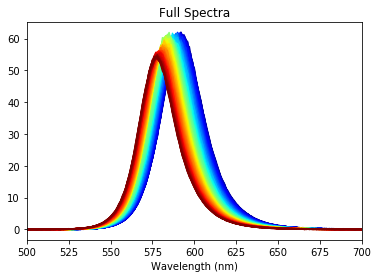

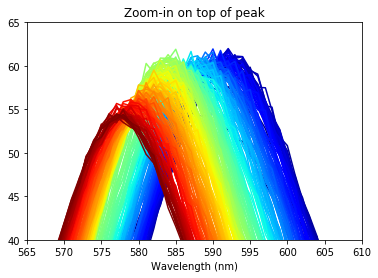

In [27]:
df.plot(y=df_columnNames_new[10:-1],legend=False,colormap='jet',xlim=(500,700),title='Full Spectra')
df.plot(y=df_columnNames_new[10:-1],legend=False,colormap='jet',xlim=(565,610),ylim=(40,65),title='Zoom-in on top of peak')

<a id='2'></a>
# 2. Fitting data to Gaussian peaks 
When working with spectral data, you often want to extract out information about the change in features over time. In this example, we have a single gaussian-shape peak for each scan. So naturally, we should fit each scan to a single gaussian function and then extract out the amplitude, center, and standard deviation of the peak. <br><br>
I wrote a [blog post](http://emilygraceripka.com/blog/16), and have a [reference notebook](https://github.com/emilyripka/BlogRepo/blob/master/181119_PeakFitting.ipynb) for fitting gaussian peaks, so will not go into too much detail here.<br><br>

<a id='2.1'></a>
## 2.1 Iterative fitting over dataframe <a href='#TOC'><b>(back to TOC)</b></a><br>
First, you need to define a function $\_1G$ of the form of a gaussian distribution:

In [28]:
def _1G(wavelength_labels, amp1,cen1,sigma1):
    return amp1*(1./(sigma1*(np.sqrt(2.*np.pi))))*(np.exp(-((wavelength_labels-cen1)**2.)/((2.*sigma1)**2.)))

Then create ndarrays of zeros to store the gaussian fitting parameters in.

In [29]:
popt = np.zeros((np.shape(df)[1],3))
pcov = np.zeros((np.shape(df)[1],3,3))
perr = np.zeros((np.shape(df)[1],3))
pars = np.zeros((popt.shape[0],3))
peak = np.zeros((popt.shape[0],np.shape(df)[0]))

Next, we fit the first Scan to the gaussian function, and assign the fitting parameters to the ndarrys we created above.

In [30]:
xAxis = np.nan_to_num(np.array(df.index))
guess = [55,590,20]
i = 10
scanString = 'Scan '+str(i)
popt[i,:], pcov[i,:] = scipy.optimize.curve_fit(_1G, xAxis, df[scanString], p0=guess)
peak[i,:] = _1G(xAxis, *popt[i,:])
perr[i,:] = np.sqrt(np.diag(pcov[i,:]))

Lastly, we iterate over the entire number of scans, feeding in the guess p0 parameters as the parameters from the previous scan.

In [31]:
for i in range(11,np.shape(df)[1]-1):
    j = i-1
    scanString = 'Scan '+str(i)
    popt[i,:], pcov[i,:] = scipy.optimize.curve_fit(_1G, xAxis, df[scanString], p0=popt[j,:])
    peak[i,:] = _1G(xAxis, *popt[i,:])
    perr[i,:] = np.sqrt(np.diag(pcov[i,:]))

<a id='2.2'></a>
## 2.2 Converting nddata Fitting parameters to a dataframe <a href='#TOC'><b>(back to TOC)</b></a><br>

We then want to take the fitting parameters on peak center, peak amplitude, and peak standard deviation, and visualize the data.<br> We want to be able to watch a shift in these three parameters over the course of the experimental time. <br>
To do this, we need to create an x-axis ndarray, time_array, which contains the time increments for the experiment.

In [32]:
scan_length = 0.5          #minutes
time_vector_length = np.shape(df)[1]
time_vector = np.arange(0,time_vector_length*scan_length,scan_length)[:]

time_array = np.zeros((time_vector.shape[0]))
for i in range(time_vector.shape[0]):
    time_array[i] = time_vector[i]

Then we add this time_array to the current fitting parameters array by stacking the two together.

In [33]:
time_array = np.reshape(time_array, (np.shape(time_array)[0],1))
fitData_ndarray = ((np.hstack((time_array,popt))).T)[:,10:-2]

Then we can convert this ndarry to a dataframe for easier data visualization and manipulation.

In [34]:
fitData_df = pd.DataFrame(fitData_ndarray.T)
fitData_df.head()

,0,1,2,3
0,5.0,1334.559471,590.029123,11.524225
1,5.5,1425.311939,590.066343,10.875346
2,6.0,1428.683301,591.119620,10.300490
3,6.5,1428.463385,591.989966,10.290524
4,7.0,1431.618267,591.906336,10.151259


Lastly we will want to rename the columns to their respective fitting parameters, as well as re-assign the index to the time_array we made.

In [35]:
fitData_df.rename(columns={0:'Time (min)', 1:'Norm. Peak Amplitude',2:'Wavelength (nm)',3:'FWHM (nm)'}, inplace=True)
fitData_df['FWHM (nm)'] = fitData_df['FWHM (nm)']*2
fitData_df = fitData_df.set_index('Time (min)')
fitData_df.head()

,Norm. Peak Amplitude,Wavelength (nm),FWHM (nm)
Time (min),,,
5.0,1334.559471,590.029123,23.048450
5.5,1425.311939,590.066343,21.750691
6.0,1428.683301,591.119620,20.600979
6.5,1428.463385,591.989966,20.581048
7.0,1431.618267,591.906336,20.302518


<a id='3'></a>
# 3. Extracting Fitting Information
To visualize the fitting parameters, we can easily plot a shift in them over time. <br>This data can then be fit to linear, mono- or bi-exponential curves depending on the trend.
<a id='3.1'></a>
## 3.1 Normalized Peak Intensity Shift <a href='#TOC'><b>(back to TOC)</b></a><br>

In [40]:
#fig = figure(figsize=(4,3))
#gs = gridspec.GridSpec(1,1)
#ax1 = fig.add_subplot(gs[0])
#fitData_df['Norm. Peak Amplitude'].plot(legend=False,style=["ro"],title="Norm. Peak Amplitude Shift",xlim=(-1,160),ax=ax1)
#fitData_df['Wavelength (nm)'].plot(legend=False,style=["ro"],title="Wavelength Shift",xlim=(-1,160),ax=ax1)
#fitData_df['FWHM (nm)'].plot(legend=False,style=["ro"],title="Peak Width Shift",xlim=(-1,160),ax=ax1)
#fig.tight_layout()
#fig.savefig("dataframe_fitting_amplitude.png", format="png",dpi=1000)
#fig.savefig("dataframe_fitting_wavelength.png", format="png",dpi=1000)
#fig.savefig("dataframe_fitting_FWHM.png", format="png",dpi=1000)

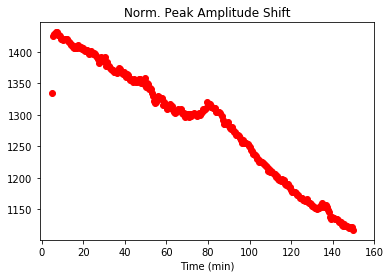

In [41]:
fitData_df['Norm. Peak Amplitude'].plot(legend=False,style=["ro"],title="Norm. Peak Amplitude Shift",xlim=(-1,160))

<a id='3.2'></a>
## 3.2 Wavelength Shift <a href='#TOC'><b>(back to TOC)</b></a><br>

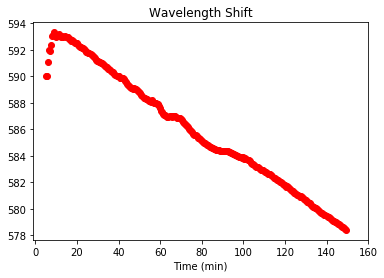

In [42]:
fitData_df['Wavelength (nm)'].plot(legend=False,style=["ro"],title="Wavelength Shift",xlim=(-1,160))

<a id='3.3'></a>
## 3.3 FWHM Shift <a href='#TOC'><b>(back to TOC)</b></a><br>

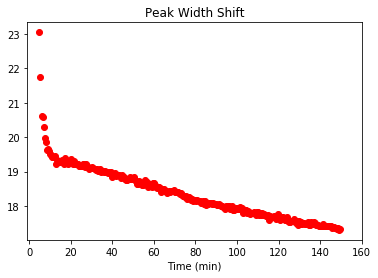

In [43]:
fitData_df['FWHM (nm)'].plot(legend=False,style=["ro"],title="Peak Width Shift",xlim=(-1,160))

<a id='4'></a>
# 4. Saving dataframes
Perhaps you want to save your dataframe to use in another notebook, or to send it to another user to work with your data. <br><br>
For the former, it makes sense to save in the pickle format, which saves the dataframe as an as-is object, and can be read in and looks identical to what you were working with previously.
<a id='4.1'></a>
## 4.1 Pickle format <a href='#TOC'><b>(back to TOC)</b></a><br>

In [44]:
df.to_pickle('CleanData.pkl')

In [45]:
df_pickle = pd.read_pickle('CleanData.pkl')

In [46]:
df_pickle.head()

,Scan 1,Scan 2,Scan 3,Scan 4,Scan 5,Scan 6,Scan 7,Scan 8,Scan 9,Scan 10,...,Scan 293,Scan 294,Scan 295,Scan 296,Scan 297,Scan 298,Scan 299,Scan 300,Scan 301,Scan 302
Wavelength (nm),,,,,,,,,,,,,,,,,,,,,
430.000000,0.058043,-0.019747,0.089483,0.048062,0.048928,-0.039297,0.000000,0.049792,0.069252,0.038574,...,0.040734,0.040934,-0.010229,0.000000,0.050478,0.049519,-0.019920,-0.030978,-0.050528,0.040266
431.059998,-0.009702,0.029207,0.059682,0.060609,0.078461,-0.029884,0.009626,-0.049555,0.039333,0.029028,...,-0.052168,0.010187,0.020483,0.051043,0.010135,0.030968,0.000000,0.019929,0.061345,0.081356
431.959992,0.009580,0.009719,0.019442,0.067501,0.030053,-0.069307,0.048137,-0.029152,-0.039360,0.019405,...,0.010191,0.010512,0.050032,0.049353,0.020095,-0.061382,0.020747,0.010256,0.010159,0.041944
433.029999,0.029176,0.048107,0.048642,-0.010163,0.039304,0.059814,0.019370,-0.039072,0.029213,0.000000,...,0.029989,-0.038470,0.000000,-0.031027,-0.010570,-0.010119,0.030375,0.020321,-0.030248,-0.009978
433.929993,0.019258,0.029846,-0.068961,-0.029745,0.019614,-0.049085,0.009721,0.038927,0.000000,0.039839,...,0.019645,0.000000,0.010084,0.010202,0.000000,0.020233,0.000000,-0.081288,-0.010363,0.112423


<a id='4.2'></a>
## 4.2 CSV format <a href='#TOC'><b>(back to TOC)</b></a><br>
If instead you want to send your clean dataframe to another user who isn't keen on python (how sad :[), then you can save your data in the CSV format, however be warned if you try to read this back in, you index will be screwed up.

In [47]:
df.to_csv('CleanData.csv')

In [48]:
df_csv = pd.read_csv('CleanData.csv')

In [49]:
df_csv.head()

,Wavelength (nm),Scan 1,Scan 2,Scan 3,Scan 4,Scan 5,Scan 6,Scan 7,Scan 8,Scan 9,...,Scan 293,Scan 294,Scan 295,Scan 296,Scan 297,Scan 298,Scan 299,Scan 300,Scan 301,Scan 302
0,430.000000,0.058043,-0.019747,0.089483,0.048062,0.048928,-0.039297,0.000000,0.049792,0.069252,...,0.040734,0.040934,-0.010229,0.000000,0.050478,0.049519,-0.019920,-0.030978,-0.050528,0.040266
1,431.059998,-0.009702,0.029207,0.059682,0.060609,0.078461,-0.029884,0.009626,-0.049555,0.039333,...,-0.052168,0.010187,0.020483,0.051043,0.010135,0.030968,0.000000,0.019929,0.061345,0.081356
2,431.959992,0.009580,0.009719,0.019442,0.067501,0.030053,-0.069307,0.048137,-0.029152,-0.039360,...,0.010191,0.010512,0.050032,0.049353,0.020095,-0.061382,0.020747,0.010256,0.010159,0.041944
3,433.029999,0.029176,0.048107,0.048642,-0.010163,0.039304,0.059814,0.019370,-0.039072,0.029213,...,0.029989,-0.038470,0.000000,-0.031027,-0.010570,-0.010119,0.030375,0.020321,-0.030248,-0.009978
4,433.929993,0.019258,0.029846,-0.068961,-0.029745,0.019614,-0.049085,0.009721,0.038927,0.000000,...,0.019645,0.000000,0.010084,0.010202,0.000000,0.020233,0.000000,-0.081288,-0.010363,0.112423
